<a href="https://colab.research.google.com/github/anishkuvelkar/Cali-house-price-prediction-XGBoost-regressor-/blob/main/California_house_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [138]:
!pip install xgboost

In [234]:
import pandas as pd
import numpy as np
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
import zipfile
import os
import sklearn.datasets
from google.colab import files
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error

In [9]:
DS= files.upload()

Saving archive (3).zip to archive (3).zip


In [95]:
os.mkdir('/content/CaliHousePrediction')

FileExistsError: [Errno 17] File exists: '/content/CaliHousePrediction'

In [164]:
with zipfile.ZipFile('/content/archive (3).zip', 'r') as zip_ref:
    zip_ref.extractall('/content/CaliHousePrediction')

In [175]:
DS= pd.read_csv('/content/CaliHousePrediction/housing.csv')

In [176]:
DS.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [178]:
Y= DS['median_house_value']
DS= DS.drop('median_house_value',axis=1)


In [179]:
DS.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,NEAR BAY


In [180]:
DS['median_house_value']= Y
DS.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,NEAR BAY,452600.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,NEAR BAY,358500.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,NEAR BAY,352100.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,NEAR BAY,341300.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,NEAR BAY,342200.0


In [181]:
DS.shape

(20640, 10)

In [182]:
DS.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
ocean_proximity         0
median_house_value      0
dtype: int64

#Remove the rows with null values

In [185]:
DS.groupby('ocean_proximity')

In [186]:
grouped = DS.groupby('ocean_proximity')

# Find total number of each category in the group
category_counts = grouped.size()

# Find number of null values in each group for each column
null_counts = grouped.apply(lambda x: x.isnull().sum())

print("Total number of each category in the group:\n", category_counts)
print("\nNumber of null values in each group:\n", null_counts)

Total number of each category in the group:
 ocean_proximity
<1H OCEAN     9136
INLAND        6551
ISLAND           5
NEAR BAY      2290
NEAR OCEAN    2658
dtype: int64

Number of null values in each group:
                  longitude  latitude  housing_median_age  total_rooms  \
ocean_proximity                                                         
<1H OCEAN                0         0                   0            0   
INLAND                   0         0                   0            0   
ISLAND                   0         0                   0            0   
NEAR BAY                 0         0                   0            0   
NEAR OCEAN               0         0                   0            0   

                 total_bedrooms  population  households  median_income  \
ocean_proximity                                                          
<1H OCEAN                   102           0           0              0   
INLAND                       55           0           0   

#We can remove the null entries because the number is insignificant


In [187]:
DS.dropna(inplace=True,axis=0)
DS.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
ocean_proximity       0
median_house_value    0
dtype: int64

In [188]:
DS.shape

(20433, 10)

In [189]:
DS.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000
mean,-119.570689,35.633221,28.633094,2636.504233,537.870553,1424.946949,499.433465,3.871162,206864.413155
std,2.003578,2.136348,12.591805,2185.269567,421.385070,1133.208490,382.299226,1.899291,115435.667099
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1450.000000,296.000000,787.000000,280.000000,2.563700,119500.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.536500,179700.000000
75%,-118.010000,37.720000,37.000000,3143.000000,647.000000,1722.000000,604.000000,4.744000,264700.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [190]:
category_counts = grouped.size()
print("Total number of each category in the group:\n", category_counts)

Total number of each category in the group:
 ocean_proximity
<1H OCEAN     9136
INLAND        6551
ISLAND           5
NEAR BAY      2290
NEAR OCEAN    2658
dtype: int64


#Create mapping between text and numerical value

In [201]:
ocean_proximity_map = {
    '<1H OCEAN': 1,
    'INLAND': 2,
    'ISLAND': 3,
    'NEAR BAY': 4,
    'NEAR OCEAN': 5
}

# Create a new column with numerical values based on the mapping dictionary
DS['ocean_proximity_numerical'] = DS['ocean_proximity'].map(ocean_proximity_map)


In [203]:
DS.groupby('ocean_proximity_numerical').sum()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
ocean_proximity_numerical,,,,,,,,,,
1,-1073678.63,312221.67,264492.0,23734427.0,4937435.0,13717591.0,4674364.0,38223.7621,<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<...,2.170581e+09
2,-777786.12,238609.81,157610.0,17677259.0,3468095.0,9045105.0,3105133.0,20854.4902,INLANDINLANDINLANDINLANDINLANDINLANDINLANDINLA...,8.113300e+08
3,-591.77,166.79,212.0,7873.0,2102.0,3340.0,1383.0,13.7221,ISLANDISLANDISLANDISLANDISLAND,1.902200e+06
4,-277532.55,85808.96,85707.0,5653061.0,1167195.0,2787290.0,1106026.0,9478.7185,NEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR B...,5.885640e+08
5,-313598.81,91286.38,77039.0,6799071.0,1415482.0,3562615.0,1318018.0,10528.7521,NEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR O...,6.544833e+08


In [204]:
DS.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value,ocean_proximity_numerical
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,NEAR BAY,452600.0,4
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,NEAR BAY,358500.0,4
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,NEAR BAY,352100.0,4
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,NEAR BAY,341300.0,4
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,NEAR BAY,342200.0,4


In [207]:
DS = DS.drop('ocean_proximity',axis=1)


KeyError: "['ocean_proximity'] not found in axis"

In [208]:
Y = DS['median_house_value']
DS = DS.drop('median_house_value',axis=1)

In [212]:
DS['median_house_value']= Y
DS.head()
DS.shape

(20433, 10)

#Understanding correlation between different columns by constructing a heat map

In [210]:
Cor = DS.corr()

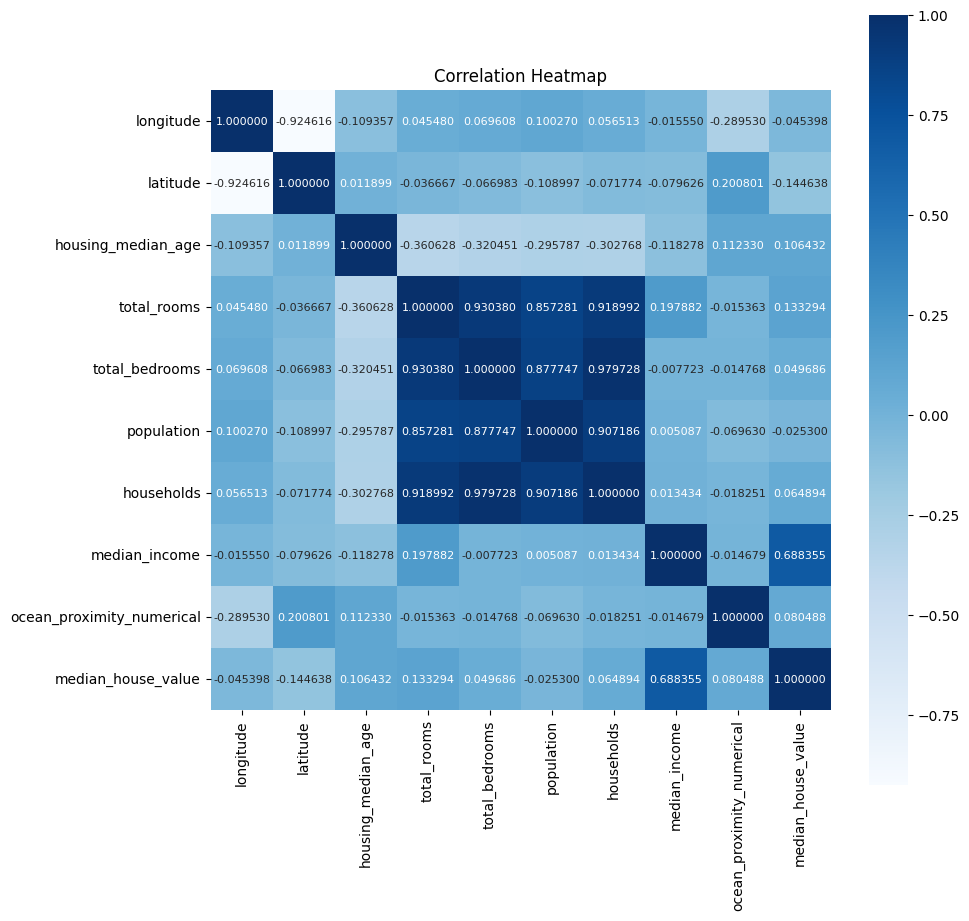

In [213]:
plt.figure(figsize=(10, 10))
sns.heatmap(Cor, annot=True, cbar=True,square=True,fmt='1f',annot_kws={'size':8},cmap='Blues')
plt.title('Correlation Heatmap')
plt.show()

In [214]:
X= DS.drop('median_house_value',axis=1)
Y= DS['median_house_value']

In [216]:
X.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity_numerical
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,4
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,4
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,4
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,4
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,4


In [217]:
Y.head()

0    452600.0
1    358500.0
2    352100.0
3    341300.0
4    342200.0
Name: median_house_value, dtype: float64

#Splitting into training and test

In [220]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [221]:
X.shape, X_train.shape, X_test.shape

((20433, 9), (16346, 9), (4087, 9))

In [222]:
Y.shape, Y_train.shape, Y_test.shape

((20433,), (16346,), (4087,))

#Model Training ( XGboost regressor )

In [223]:
model = XGBRegressor()
model.fit(X_train, Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

#Evaluation

In [225]:
X_predict = model.predict(X_train)
print(X_predict)


[226743.38   97228.086 265390.47  ... 304036.62  238161.02  268129.56 ]


#R SQUARED ERROR

In [237]:
Score = r2_score(Y_train, X_predict)
print("R squared error : ", Score)

R squared error :  0.9380974744612477


In [236]:
#mean absolute error

Score_2 = mean_absolute_error(Y_train, X_predict)
print("mean absolute error : ", Score_2)

mean absolute error :  20121.870201305937


#Visualizing the actual prices with the predicted prices

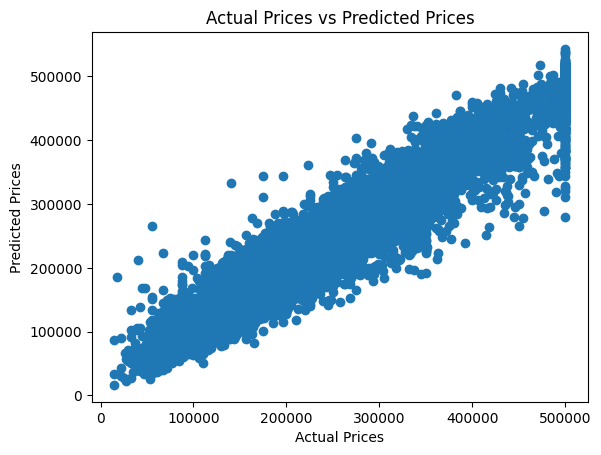

In [238]:
plt.scatter(Y_train, X_predict)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Prices vs Predicted Prices")
plt.show()

#Building a predictor model

In [249]:
import numpy as np

# Example input data
input = np.array([-122.26,37.85,52.0,2643.0,626.0,1212.0,620.0,1.9167,'NEAR BAY'])

# Convert categorical value to numerical
if input[8] == 'NEAR BAY':
    input[8] = 4
elif input[8] == 'NEAR OCEAN':
    input[8] = 5
elif input[8] == 'ISLAND':
    input[8] = 3
elif input[8] == 'INLAND':
    input[8] = 2
elif input[8] == '<1H OCEAN':
    input[8] = 1
else:
    raise ValueError("Unknown categorical value encountered.")

# Convert input array elements to float (if not already)
input = input.astype(float)

# Reshape input to a format expected by the model (assuming model expects a 2D array)
input = input.reshape(1, -1)

# Make prediction using the model (assuming `model` is already defined and trained)
prediction = model.predict(input)

# Print the prediction
print(prediction)


[176801.78]
